In [ ]:

import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
defect_types = 'Normal', 'Anomaly'
path = Path('Parts')

In [ ]:
fns = get_image_files(path)
fns

(#137) [Path('Parts/Anomaly/Anomaly36.jpg'),Path('Parts/Anomaly/Anomaly21.jpg'),Path('Parts/Anomaly/Anomaly1.jpg'),Path('Parts/Anomaly/Anomaly35.jpg'),Path('Parts/Anomaly/Anomaly12.jpg'),Path('Parts/Anomaly/Anomaly31.jpg'),Path('Parts/Anomaly/Anomaly9.jpg'),Path('Parts/Anomaly/Anomaly23.jpg'),Path('Parts/Anomaly/Anomaly10.jpg'),Path('Parts/Anomaly/Anomaly26.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
parts = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = parts.dataloaders(path)

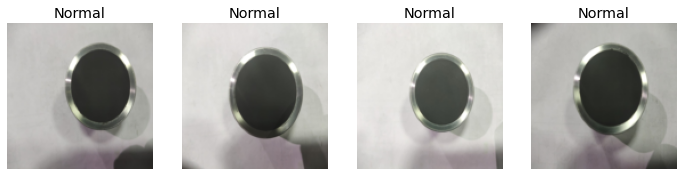

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
parts = parts.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = parts.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.366938,3.957812,0.666667,00:02


epoch,train_loss,valid_loss,error_rate,time
0,1.023511,2.698578,0.666667,00:02
1,0.941424,1.878828,0.629630,00:02
2,0.864595,0.899106,0.444444,00:02
3,0.766972,0.348134,0.148148,00:02
4,0.637519,0.201405,0.111111,00:02
5,0.541260,0.174254,0.074074,00:02


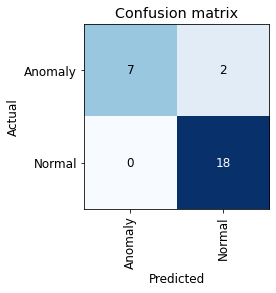

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

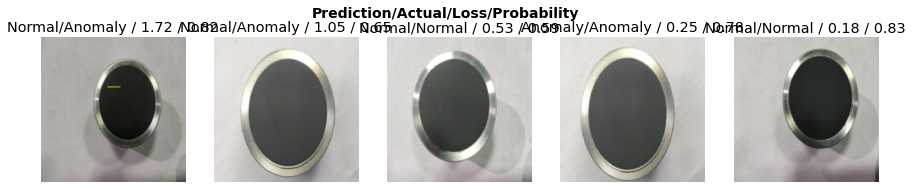

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Anomaly; Probability: 0.9960')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Upload the part image'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.6 MB 23.3 MB/s eta 0:00:01
     |████████████████████████████████| 556 kB 25.0 MB/s eta 0:00:01
     |████████████████████████████████| 396 kB 29.7 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 13.7 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 4.4 MB/s  eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.1.5 requires nbconvert<6, but you'll have nbconvert 6.3.0 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.16 O